#  <span style="color:Magenta">**Final Poject** </span>

In [1018]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.googleapis.com/kaggle-datasets-images/792/1472/8853c0b4591bba14e29305fcaa29f2f9/dataset-original.jpg")

## **Medical Appointment No Shows**
Why do 20% of patients miss their scheduled appointments?

Link to dataset: https://www.kaggle.com/joniarroba/noshowappointments

## **Data Dictionary**
> 01 - PatientId

Identification of a patient

> 02 - AppointmentID

Identification of each appointment

> 03 - Gender

Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

> 04 - ScheduledDay

The day the patient booked the appointment, this is before or at the same day of AppointmentDay of course.

> 05 - AppointmentDay

The day day the the apponitment is booked for

> 06 - Age

How old is the patient.

> 07 - Neighbourhood

Where the appointment takes place.
> 08 - Scholarship

True of False (A government financial aid to poor Brazilian families) https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
> 09 - Hypertension

True or False (High blood pressure)

> 10 - Diabetes

True or False
> 11 - Alcoholism

True or False
> 12 - Handcap

0-4 (the handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2)

> 13 - SMS_received

1 or more messages sent to the patient.
> 14 - No-show

True or False.

In [1019]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [1020]:
df = pd.read_csv(r"C:\Users\Behnam\Downloads\Python\Datasets\Medical_Appointment_No_Shows.csv", converters={"PatientId":str})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


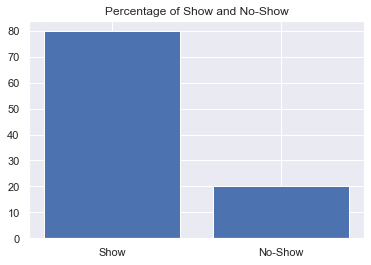

In [1021]:
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.title("Percentage of Show and No-Show")   
# Make a fake dataset:
height = [  len(df[df['No-show']=='No'])/len(df)*100, len(df[df['No-show']=='Yes'])/len(df)*100]
bars = ('Show', 'No-Show')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### 20% of patients miss their scheduled appointments

# **Data Cleaning**

In [1022]:
d_replace = {"Yes": 1, "No": 0}
df = df.replace({"No-show": d_replace})
d_replace = {"M": 1, "F": 0}
df = df.replace({"Gender": d_replace})

In [1023]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df['Sch_Date'] = df['ScheduledDay'].dt.date
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03
110523,3596266328735,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03
110524,15576631729893,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27
110525,92134931435557,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27


In [1024]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df['App_Date'] = df['AppointmentDay'].dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29


In [1025]:
len(df[df["AppointmentDay"] < df["ScheduledDay"]])

38568

### Many  AppointmentDay  are sooner than ScheduledDay(38568)

Which is not possible!

>'AppointmentDay' has no value for time of the day and it has many values(38568) smaller than 'ScheduledDay' which is not possile!

The reason for this problem is that probably these appoinments happened at the same day that theye're booked but because we don't have the exact hour for 'AppointmentDay' their differenrce is negative.

To solve this problem, we add 23 hrs and 59 min and 59 secs to the 'AppointmentDay'. Now all 'AppointmentDay' are still at the same the same day but we only have 5 negetive values for: 

    df["AppointmentDay"] - df["ScheduledDay"]

In [1026]:
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29


In [1027]:
len(df[ df.AppointmentDay < df.ScheduledDay ])

5

### Now we have only 5 rows with ScheduledDay later than AppointmentDay

We can drop these rows

In [1028]:
df.drop( df[df.AppointmentDay <= df.ScheduledDay].index, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29


## Creating a new column "LeadDays":
difference in days between AppointmentDay and ScheduledDay


In [1029]:
df['LeadDays']=(df["AppointmentDay"] - df["ScheduledDay"]).astype('timedelta64[D]').astype(int)

In [1030]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date,LeadDays
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0


In [1031]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Sch_Date', 'App_Date', 'LeadDays'],
      dtype='object')

In [1032]:
df['ScheduledDay_day'] = df['ScheduledDay'].dt.day
df['ScheduledDay_dayofweek'] = df['ScheduledDay'].dt.dayofweek

df['AppointmentDay_day'] = df['AppointmentDay'].dt.day
df['AppointmentDay_dayofweek'] = df['AppointmentDay'].dt.dayofweek

>AppointmentDay_dayofweek : 0 means Monday

>AppointmentDay_dayofweek: 6 means Sunday

# **plotting**

### Ploting the number of missed and not missed appointments based on the 'LeadDays' 
'LeadDays' equals the difference between the day that appointment is booked and the day the it is booked for

In [1033]:
plt.style.use('dark_background')


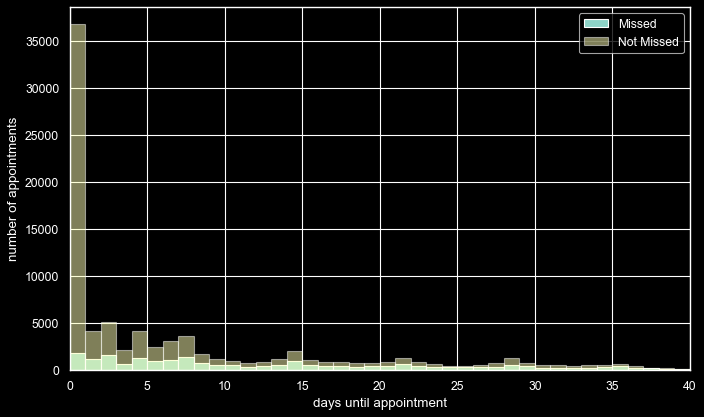

In [1034]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80)

plt.hist(df.loc[df['No-show'] == 1,'LeadDays'], 
 label = 'Missed',bins = range(0,60,1))
plt.hist(df.loc[df['No-show'] == 0,'LeadDays'], 
 label = 'Not Missed',bins = range(0,60,1),alpha =0.5)
plt.legend()
plt.xlabel('days until appointment')
plt.ylabel('number of appointments')
plt.xlim(0,40)

plt.show()

Most of not missded appointments are withinn 0 days from scheduled date which probably means many of them are walk-in appointments!

### SMS effect on show up

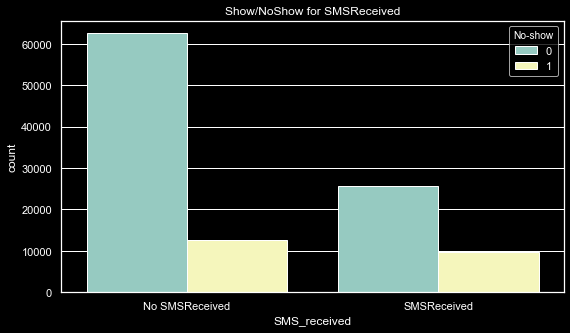

In [1035]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x=df.SMS_received, hue=df['No-show'], data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()


> This plot shows that receiving sms has a great impact on paitients show-ups!

In [1036]:
sms_received_show = len(df[ (df.SMS_received == 1) &  (df['No-show'] == 1)]) / len(df[ df.SMS_received == 1])
sms_not_received_show = len(df[ (df.SMS_received == 0) &  (df['No-show'] == 1)]) / len(df[ df.SMS_received == 0])

In [1037]:
(round(sms_received_show*100), round(sms_not_received_show*100))      

(28, 17)

### *Interesting Fact*

1. <span style="color:red">**Did you know that** </span>

> When paitient received SMS they missided their appointments 17% 

> but when they don't, this numbere increses to 28%

### Analysis on the day of week

In [1038]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [1039]:
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday_name

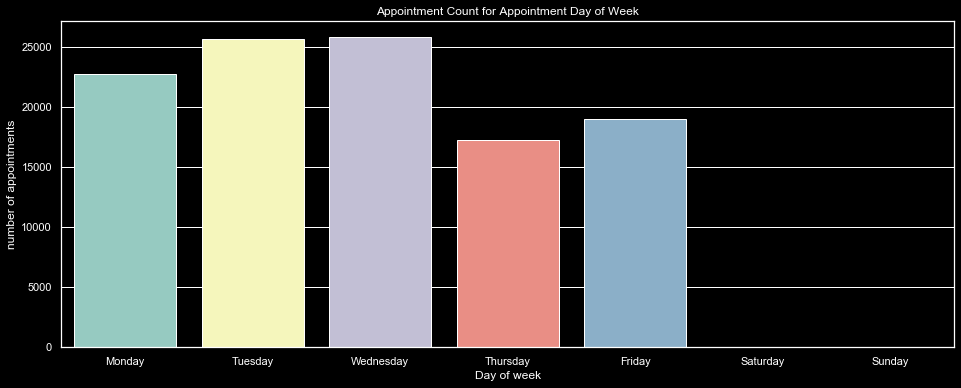

In [1040]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x=df.AppointmentDay_DOW, order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
ax.set(xlabel='Day of week', ylabel='number of appointments')
plt.show()


In [1041]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date,LeadDays,ScheduledDay_day,ScheduledDay_dayofweek,AppointmentDay_day,AppointmentDay_dayofweek,AppointmentDay_DOW
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,29,4,29,4,Friday


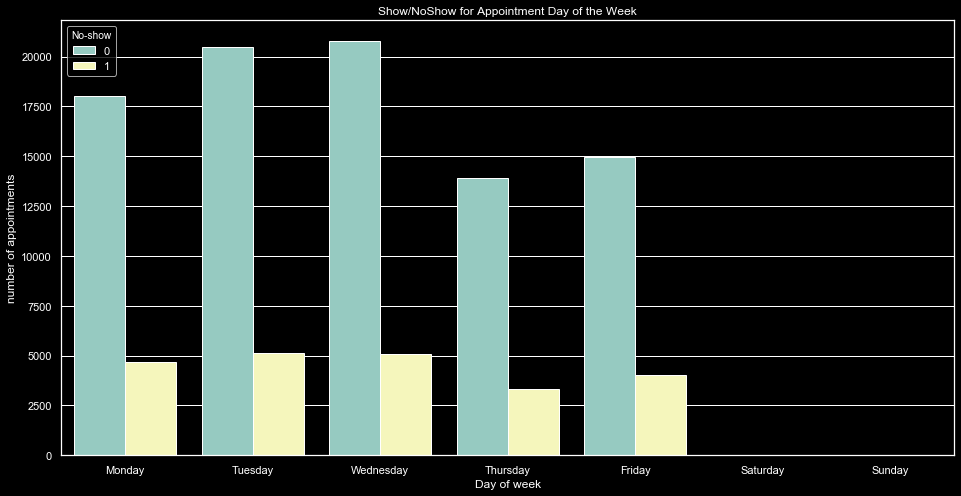

In [1042]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=df['No-show'], order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
ax.set(xlabel='Day of week', ylabel='number of appointments')
plt.show()

In [1043]:
for day in list(np.sort(df.AppointmentDay_DOW.unique())):
    print(day,\
          round(len(df[(df.AppointmentDay_DOW == day)&(df['No-show'] == 1)])/len(df[df.AppointmentDay_DOW == day])*100))   

Friday 21
Monday 21
Saturday 23
Thursday 19
Tuesday 20
Wednesday 20


### *Interesting Fact*

1. <span style="color:red">**Did you know that** </span>

> Saturday has the highets percentage of no-show (23%)

We only have a few records for Saturday so in the plot above it looks like 0 but is not actually! 

# **Desicion Tree**

> First we make a Decision Tree based on only the original columns.

In [1044]:
df_ml_dt = df[['No-show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledDay_dayofweek',\
        'ScheduledDay_day','AppointmentDay_day','AppointmentDay_dayofweek', 'AppointmentDay_DOW']]

In [1045]:
df_ml_dt = pd.get_dummies(df_ml_dt,columns=['Neighbourhood', 'AppointmentDay_DOW'])
df_ml_dt

,No-show,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_dayofweek,ScheduledDay_day,AppointmentDay_day,AppointmentDay_dayofweek,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentDay_DOW_Friday,AppointmentDay_DOW_Monday,AppointmentDay_DOW_Saturday,AppointmentDay_DOW_Thursday,AppointmentDay_DOW_Tuesday,AppointmentDay_DOW_Wednesday
0,0,0,62,0,1,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,56,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,62,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,8,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,56,0,1,1,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,56,0,0,0,0,0,1,1,3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1046]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [1047]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [1048]:
X = df_ml_dt.drop('No-show',axis=1)
Y = df_ml_dt['No-show']
dt.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

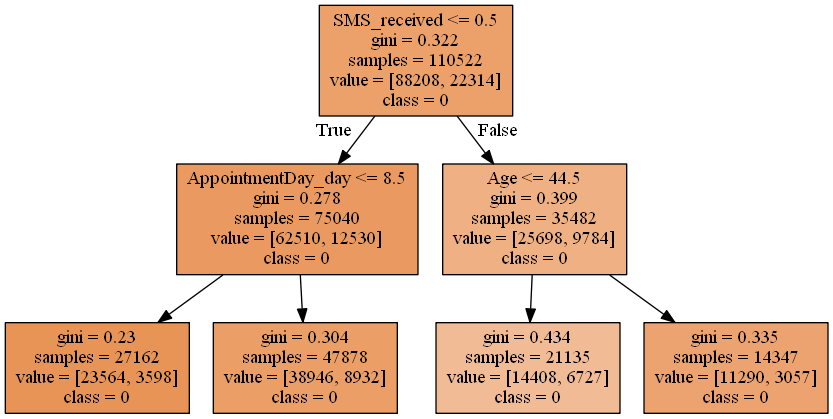

In [1049]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# **Machine Leaning**


### Random Forest Classifier on the original columns

In [1066]:
df_ml_rf = df[[ 'No-show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledDay_dayofweek',\
        'ScheduledDay_day','AppointmentDay_day','AppointmentDay_dayofweek', 'AppointmentDay_DOW']]

In [1067]:
df_ml_rf = pd.get_dummies(df_ml_rf,columns=['Neighbourhood', 'AppointmentDay_DOW'])
df_ml_rf

,No-show,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_dayofweek,ScheduledDay_day,AppointmentDay_day,AppointmentDay_dayofweek,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentDay_DOW_Friday,AppointmentDay_DOW_Monday,AppointmentDay_DOW_Saturday,AppointmentDay_DOW_Thursday,AppointmentDay_DOW_Tuesday,AppointmentDay_DOW_Wednesday
0,0,0,62,0,1,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,56,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,62,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,8,0,0,0,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,56,0,1,1,0,0,0,4,29,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,56,0,0,0,0,0,1,1,3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1068]:
target = 'No-show'
predictors = df_ml_rf.columns[1:]

In [1069]:
from sklearn.model_selection import train_test_split

X = df_ml_rf[predictors]
Y = df_ml_rf[target]


X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 5)

In [1070]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met

clf_rf = RandomForestClassifier(random_state = 5, n_estimators=100)
clf_rf.fit(X_train,Y_train)


y_pred_rf = clf_rf.predict(X_test)
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]

In [1071]:
round(met.accuracy_score(Y_test, y_pred_rf), 4)

0.79

In [1072]:
round(met.roc_auc_score(Y_test, y_pred_proba_rf), 4)

0.719

# **AutoML Result**

Now we want to try auto ml H2o:

First, we nooed to add the dataset into the h2o driverless app,

then split the data into train and test,

then set the accuracey, time and interpretability as you can see in the screenshot below

and finaly, we run the model.

After the calculation is done, you can see that the best model is LightGBM and AUC is 0.7403



In [732]:
Image(url= "https://i.ibb.co/6P1Wj26/H2-O-Appointment.png")

## H2o gives the AUC of 0.7403
>We want to make a more accurate model

This AUC is better than what we calculated, so we decided to design an experiment to beat the H2o 

# **Human VS Machine**

In [733]:
Image(url= "https://i.ibb.co/7gS167p/yellow-human-vs-machine.jpg")

We're going to create a model to produce better AUC:

> First we try creating new columns(feature engineering)

>Then we try different models to get the best AUC possibel(hyper parameter tuning)

# **Machine Learning Advanced**

### First we want to create new columns based on our domain knowledge

## Feature engineering: 
>### 1.Prior No-Show Rate:

No-shows as a percentage of total appointments (hypothesis: some patients persistently miss their appointments)

>### 2.Status of the last appointment 

(hypothesis: if you miss your last appointment, you are more likely to attend the next one)

>### 3.Number of previous appointments 

(hypothesis: patients with persistent conditions are more likely to attend)

>### 4.Days since last appointment: 

difference in days between the last 2 appointments

### <span style="color:red">*This cell  below slices the dataframe and takes a long time to run!* </span>

be patient!

In [734]:
%%time
# No Show rate
# Last Show
# Appt Count
# Days since last


df = df.sort_values(["PatientId","App_Date"])
l_no_show_rates = []
l_last_shows = []
l_appts_counts = []
l_appts_lasts = []

for pat in df["PatientId"].unique():
    dfx = df[df["PatientId"] == pat]
    l_no_show = list(dfx["No-show"])
    
    l_no_show_rate = [0]
    l_appts_last = [0]
    for i in range(1,len(dfx)):
        # no show rates
        rate_so_far = round((np.sum(l_no_show[0:i]) / i)*100,1)
        l_no_show_rate.append(rate_so_far)
        # appts since last appointment
        dates_list = list(dfx["App_Date"])
        l_appt_diff = (dates_list[i] - dates_list[i-1]).days
        l_appts_last.append(l_appt_diff)
        
    # appt count
    l_appts_count = []
    for i in range(0,len(dfx)):
        l_appts = i+1
        l_appts_count.append(l_appts)
        
    l_no_show_rates.extend(l_no_show_rate)
    l_appts_counts.extend(l_appts_count)
    l_appts_lasts.extend(l_appts_last)
    
    # last show
    l_last_show = []
    l_last_show = [0] + l_no_show[:-1]
    l_last_shows.extend(l_last_show)   

df["No_show_rate"] = l_no_show_rates
df["Last_show_status"] = l_last_shows
df["Appt_count"] = l_appts_counts
df["Last_appt_days"] = l_appts_lasts

df.head(100)

Wall time: 16min 10s


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_Date,App_Date,LeadDays,ScheduledDay_day,ScheduledDay_dayofweek,AppointmentDay_day,AppointmentDay_dayofweek,AppointmentDay_DOW,No_show_rate,Last_show_status,Appt_count,Last_appt_days
84473,11111462625267,5715720,0,2016-05-18 14:58:29+00:00,2016-06-08 23:59:59+00:00,65,REPÚBLICA,0,1,0,0,0,1,0,2016-05-18,2016-06-08,21,18,2,8,2,Wednesday,0.0,0,1,0
51059,111124532532143,5531224,1,2016-03-31 09:17:26+00:00,2016-05-03 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-31,2016-05-03,33,31,3,3,1,Tuesday,0.0,0,1,0
95359,111124532532143,5624030,1,2016-04-26 15:05:58+00:00,2016-06-01 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-26,2016-06-01,36,26,1,1,2,Wednesday,0.0,0,2,29
60744,11114485119737,5621757,0,2016-04-26 10:46:38+00:00,2016-05-25 23:59:59+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-26,2016-05-25,29,26,1,25,2,Wednesday,0.0,0,1,0
2321,11116239871275,5625265,0,2016-04-27 07:05:38+00:00,2016-04-29 23:59:59+00:00,13,SÃO PEDRO,0,0,0,0,0,0,0,2016-04-27,2016-04-29,2,27,2,29,4,Friday,0.0,0,1,0
28351,1111633122891,5674433,1,2016-05-09 11:03:50+00:00,2016-05-09 23:59:59+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,0,2016-05-09,2016-05-09,0,9,0,9,0,Monday,0.0,0,1,0
34823,1111633122891,5684529,1,2016-05-11 08:45:03+00:00,2016-05-11 23:59:59+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,0,2016-05-11,2016-05-11,0,11,2,11,2,Wednesday,0.0,0,2,2
17494,1111633122891,5713029,1,2016-05-18 09:37:39+00:00,2016-05-18 23:59:59+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,0,2016-05-18,2016-05-18,0,18,2,18,2,Wednesday,0.0,0,3,7
49269,11118512139,5649221,0,2016-05-02 18:28:46+00:00,2016-05-31 23:59:59+00:00,33,JARDIM DA PENHA,0,0,0,0,0,1,0,2016-05-02,2016-05-31,29,2,0,31,1,Tuesday,0.0,0,1,0
108378,1111852391322,5761977,1,2016-06-02 07:16:05+00:00,2016-06-07 23:59:59+00:00,41,ROMÃO,0,0,0,0,0,1,0,2016-06-02,2016-06-07,5,2,3,7,1,Tuesday,0.0,0,1,0


In [738]:
df.to_csv(r"C:\Users\Behnam\Downloads\Python\Datasets\final_proj_ml_ready.csv", index = False)

### Now we create a new dataframe with these new columns

In [794]:
df_ml = df[['No-show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received','LeadDays', 'ScheduledDay_dayofweek',\
        'ScheduledDay_day','AppointmentDay_day','AppointmentDay_dayofweek','No_show_rate',\
            'Last_show_status', 'Appt_count', 'Last_appt_days']]

In [795]:
df_ml = pd.get_dummies(df_ml,columns=['Neighbourhood'])
df_ml

,No-show,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,LeadDays,ScheduledDay_dayofweek,ScheduledDay_day,AppointmentDay_day,AppointmentDay_dayofweek,No_show_rate,Last_show_status,Appt_count,Last_appt_days,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
84473,0,0,65,0,1,0,0,0,1,21,2,18,8,2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51059,0,1,9,0,0,0,0,0,1,33,3,31,3,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95359,1,1,9,0,0,0,0,0,1,36,1,26,1,2,0.0,0,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60744,1,0,12,0,0,0,0,0,1,29,1,26,25,2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2321,0,0,13,0,0,0,0,0,0,2,2,27,29,4,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46976,0,0,8,1,0,0,0,0,1,35,2,20,25,2,100.0,1,2,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [796]:
target = 'No-show'

In [797]:
predictors = df_ml.columns[1:]

#  <span style="color:red">**RandomForest Classifier** </span>

### Now we run the Random Forest with the new columns

In [798]:
from sklearn.model_selection import train_test_split

X = df_ml[predictors]
Y = df_ml[target]


X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [799]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 5, n_estimators=100)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [800]:
y_pred = clf.predict(X_test)

In [801]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [802]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

confusion_matrix(Y_test,y_pred)

array([[25523,   856],
       [ 5697,  1081]], dtype=int64)

In [803]:
round(met.accuracy_score(Y_test, y_pred), 4)

0.8024

In [804]:
round(met.roc_auc_score(Y_test, y_pred_proba), 4)

0.7441

### Now we want to find the importance of eah columns

In [805]:
l=[]
for feature in zip(predictors, clf.feature_importances_):
    l.append(feature)
    
df_importance = pd.DataFrame(l,columns=["Variable","Importance"])\
.sort_values("Importance", ascending=False)

df_importance

,Variable,Importance
1,Age,1.691654e-01
8,LeadDays,1.403033e-01
10,ScheduledDay_day,7.595050e-02
11,AppointmentDay_day,6.689942e-02
16,Last_appt_days,5.382999e-02
9,ScheduledDay_dayofweek,4.527465e-02
12,AppointmentDay_dayofweek,4.056236e-02
15,Appt_count,3.916821e-02
0,Gender,2.841735e-02
13,No_show_rate,1.892474e-02


In [806]:
import matplotlib.pyplot as plt

In [807]:
plt.style.use('ggplot')

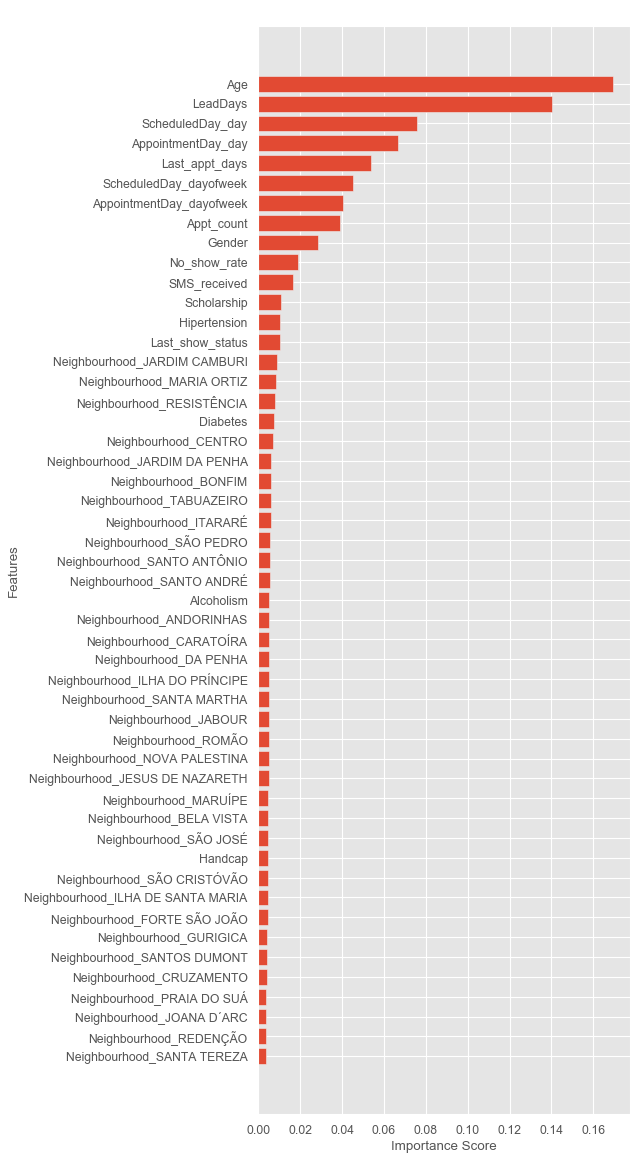

In [808]:
feature_importances = pd.DataFrame(clf.feature_importances_,
 index = predictors,
 columns=['importance']).sort_values('importance',
 ascending=False)
num = min([50,len(predictors)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 18), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### The plot above shows the importance of each column for our model
> As you can see all the columns we engineered are part of most important columns!

## **Which classifier obtains the highest performance?**

 H2o declared Light GBM as the best model, let's try it.

#  <span style="color:red">**Light GBM Classifier** </span>

If you're working for the first time with Light GBM, you should first instal it.

    pip install lightgbm

#### Light GBM doesn't work with non ASCII characters, so we need to drop these letters from column names. 

In [ ]:
# Need to rename columns here, because Light GBM doesnt like non_ASCII column names
cols_l = df_ml.columns
cols_l_new = []
for col_name in cols_l:
    col_name_new = str(col_name).encode("ascii", "ignore").decode()
    cols_l_new.append(col_name_new)
    
df_ml.columns = cols_l_new
predictors = df_ml.columns[1:]

In [814]:
X = df_ml[predictors]
Y = df_ml[target]


X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 0)

## **Hyper Parameter Tuning**
### We have tried many different combinations of parameters manualy to get the best result.
These parameters are the best!

In [962]:
import lightgbm

clf_lgbm = lightgbm.LGBMClassifier(
    n_estimators=500,
    n_jobs=-1,
    num_leaves = 51,
    objective = 'binary',
    learning_rate = 0.065,
    feature_fraction = 0.7,
    metric = 'auc'
)


In [963]:
%%time
clf_lgbm.fit(X_train, Y_train)


Wall time: 3.19 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.7, importance_type='split',
               learning_rate=0.065, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=51, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [964]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [965]:
y_pred_proba_lgbm = clf_lgbm.predict_proba(X_test)[:,1]

In [966]:
round(met.accuracy_score(Y_test, y_pred_lgbm), 4)

0.8094

In [967]:
round(met.roc_auc_score(Y_test, y_pred_proba_lgbm), 4)

0.7609

> Light GBM is a super fast and accurate model, Let's compare it with a highly tuned XGBoost model!

#  <span style="color:red">**XGBoost Classifier** </span>


### XGBoost is one the most powerful models

If you're working for the first time with XGBoost, you should first instal it.

    pip install xgboost

In [821]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [822]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy as sp 
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## **Hyper Parameter Tuning**

### We're going to find the best parameter for XGBoost 
This calculation takes a very long time to execute!

In [828]:
%%time
from sklearn.model_selection import StratifiedKFold

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=100,
        n_jobs=-1,
        **params
    )

    score = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=StratifiedKFold()).mean()
    print("Accuracy {:.8f} params {}".format(-score, params))
    return -score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    'reg_lambda': hp.uniform('reg_lambda', 0.7, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)


Accuracy -0.80860854 params {'max_depth': 5, 'gamma': '0.216', 'reg_alpha': '0.152', 'learning_rate': '0.165', 'colsample_bytree': '0.742'}
Accuracy -0.80840173 params {'max_depth': 5, 'gamma': '0.436', 'reg_alpha': '0.068', 'learning_rate': '0.172', 'colsample_bytree': '0.439'}
Accuracy -0.80719964 params {'max_depth': 7, 'gamma': '0.205', 'reg_alpha': '0.058', 'learning_rate': '0.197', 'colsample_bytree': '0.787'}
Accuracy -0.80739352 params {'max_depth': 4, 'gamma': '0.384', 'reg_alpha': '0.129', 'learning_rate': '0.055', 'colsample_bytree': '0.393'}
Accuracy -0.80707038 params {'max_depth': 3, 'gamma': '0.050', 'reg_alpha': '0.353', 'learning_rate': '0.101', 'colsample_bytree': '0.773'}
Accuracy -0.80670846 params {'max_depth': 2, 'gamma': '0.105', 'reg_alpha': '0.354', 'learning_rate': '0.131', 'colsample_bytree': '0.331'}
Accuracy -0.80854392 params {'max_depth': 6, 'gamma': '0.354', 'reg_alpha': '0.029', 'learning_rate': '0.052', 'colsample_bytree': '0.785'}
Accuracy -0.80707038

In [829]:
best['max_depth'] = int(best['max_depth'])

print("BEST PARAMS: ", best)

BEST PARAMS:  {'colsample_bytree': 0.6673254817202539, 'gamma': 0.3305222181618644, 'learning_rate': 0.15375862374407245, 'max_depth': 6, 'reg_alpha': 0.18660734533458292, 'reg_lambda': 0.7325604526577659}


In [830]:
clf_xgb = XGBClassifier(
        n_estimators=600,
        n_jobs=-1,
        **best
    )

In [831]:
%%time

clf_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6673254817202539,
              gamma=0.3305222181618644, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.15375862374407245,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.18660734533458292, reg_lambda=0.7325604526577659,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [832]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score

y_pred_xgb = clf_xgb.predict(X_test)
y_pred_proba_xgb = clf_xgb.predict_proba(X_test)[:,1]

In [833]:
round(met.accuracy_score(Y_test, y_pred_xgb), 4)

0.8037

In [834]:
round(met.roc_auc_score(Y_test, y_pred_proba_xgb), 4)

0.7563

> XGBoost is a very powerful model but not as accurate as Light GBM for predictiong this dataset and not even close in speed!

# <span style="color:Lime">**Conclusion:** </span>
### <span style="color:Fuchsia">**Light GBM Classifier** </span> <span style="color:white">*is the most accurate model.* </span>

> <span style="color:Aqua">*Accuracy: 0.8094* </span>

> <span style="color:Aqua">*AUC: 0.7609* </span>

### Plot ROC curve

In [972]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import sklearn as sk
import seaborn as sns  
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve

In [973]:
plt.style.use('dark_background')

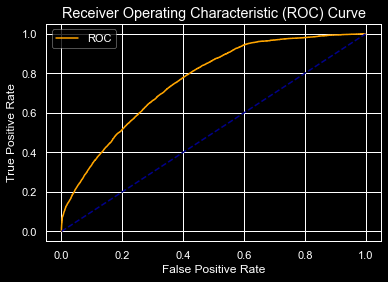

In [974]:
fper, tper, thresholds = roc_curve(Y_test, y_pred_proba_lgbm) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Summary of machine learning part:


The first model we created gave us the AUC = 0.719

But then we did some feature engineering and try different models (Light GBM and XGBoost) and tune their parameters and reached the AUC of 0.7609

At the end of the analyis we reached the conclusion that the best practice is that human and machine work together.

The best model was found by the machine(H2o) but new columns were created by human.

We didn't know Light GBM would give us the best result and we wouldn't try it, on the other hand, h2o is unable to create the columns  we created because there are made by the knowledge we had to solve this specific problem gained from studying similar analysis.



# Prediction

After creating the prediction model with AUC of 0.76 and studying other people's approach to solve  Dr. Appointment no shows problem, we found out that showing up for an appointment is not very predictable.

All analysis to solve this problem result in AUC around 0.75 which makes a lot of sence because at the end of the day we, humans are unpredictable. A lot of factors may cause a person not showing up for an appointment( for axample a sick child or an emmergency issue)



# What we can do!

For years, the standard protocol has been to make “reminder SMS” to patients the day before their appointments. This could be a good alternative: calling some patients four days before their appointments. And if they didn't answer, calling them the next day and so on. This could be done through an automated system that would allow doctor's officec to make reminder calls earlier in the day, giving patients more time to adjust their schedules if needed. 